In [41]:
# GitHub link -> https://github.com/sreksoz/Intro-to-Machine-Learning/tree/HW-1---Curve-Fit-Training-Models
import numpy as np
import scipy.optimize as opt
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

Shape of total yalefaces: (1024, 2414)
[[  5.46453924   3.47805285  10.8647382  ...   9.70635218  13.96755226
    6.76900813]
 [  3.47805285  74.86824965   7.24820856 ...  62.51751129  60.62589052
   45.85854557]
 [ 10.8647382    7.24820856 105.82305441 ...  40.71027778  94.53355765
   11.8646893 ]
 ...
 [  9.70635218  62.51751129  40.71027778 ... 110.87636774 127.25889448
   69.50486436]
 [ 13.96755226  60.62589052  94.53355765 ... 127.25889448 185.06884888
   67.90748726]
 [  6.76900813  45.85854557  11.8646893  ...  69.50486436  67.90748726
   55.10267397]]


Text(0, 0.5, 'Image Index')

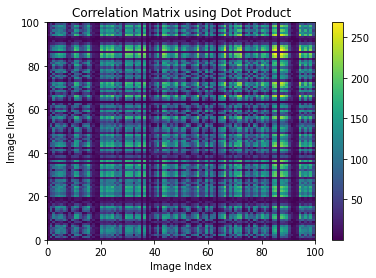

In [42]:
# Import file
results = loadmat('yalefaces.mat')
X = results['X']

# Print the shape of downloaded yalefaces
print("Shape of total yalefaces:", X.shape)    #rows: 32x32 pixels, columns: 2414 (images)

# Get the first 100 images of yalefaces
X_sample = X[:, 1:101]                      

# Compute the dot (matrix) product of two arrays, resulting in the correlation matrix
C_100 = np.matmul(X_sample.T,X_sample)

# Print the correlation matrix
print(C_100)

# Plot the correlation matrix
plt.pcolor(C_100)
plt.colorbar()
plt.title('Correlation Matrix using Dot Product')
plt.xlabel('Image Index')
plt.ylabel('Image Index')



[[ 1.         -0.13980302  0.23921646 ...  0.07657886  0.11278858
   0.16274497]
 [-0.13980302  1.         -0.60296147 ...  0.38592727 -0.24363964
   0.52124127]
 [ 0.23921646 -0.60296147  1.         ... -0.44087854  0.15561702
  -0.50314614]
 ...
 [ 0.07657886  0.38592727 -0.44087854 ...  1.          0.59082153
   0.8269396 ]
 [ 0.11278858 -0.24363964  0.15561702 ...  0.59082153  1.
   0.26240786]
 [ 0.16274497  0.52124127 -0.50314614 ...  0.8269396   0.26240786
   1.        ]]


Text(0, 0.5, 'Image Index')

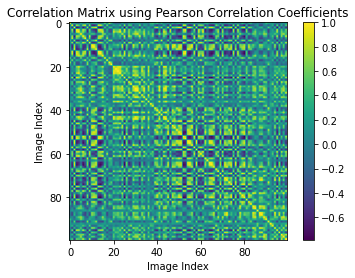

In [40]:
# Compute the correlation matrix using Pearson product-moment correlation coefficients
correlation_matrix = np.corrcoef(X_sample.T)
print(correlation_matrix)

# Plot the correlation matrix
plt.imshow(correlation_matrix)
plt.colorbar()
plt.title('Correlation Matrix using Pearson Correlation Coefficients')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

# Highly correlated images are the ones in the diagonal, with values of 1.0
# Uncorrelated images have lower correlation values

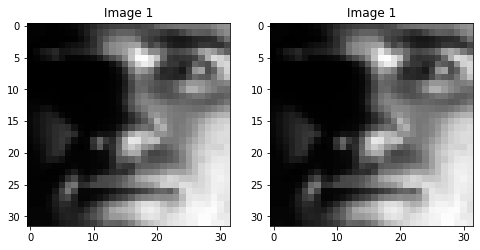

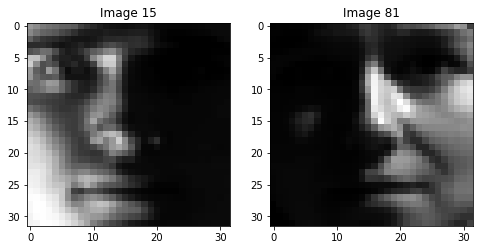

In [36]:
# Find the indices of the maximum and minimum correlation coefficients
max_idx = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)
min_idx = np.unravel_index(np.argmin(correlation_matrix), correlation_matrix.shape)

# Extract the corresponding images from the X matrix
max_img1 = X[:, max_idx[0]]
max_img2 = X[:, max_idx[1]]
min_img1 = X[:, min_idx[0]]
min_img2 = X[:, min_idx[1]]

# Plot the most correlated images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(max_img1.reshape(32, 32), cmap='gray')
ax[0].set_title('Image {}'.format(max_idx[0]+1))
ax[1].imshow(max_img2.reshape(32, 32), cmap='gray')
ax[1].set_title('Image {}'.format(max_idx[1]+1))
plt.show()

# Plot the most uncorrelated images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(min_img1.reshape(32, 32), cmap='gray')
ax[0].set_title('Image {}'.format(min_idx[0]+1))
ax[1].imshow(min_img2.reshape(32, 32), cmap='gray')
ax[1].set_title('Image {}'.format(min_idx[1]+1))
plt.show()

[[  5.46453924  12.21439488   4.64024179   8.57833297  18.98822454
    5.31794676   8.01234916   1.39143124   6.53956057   7.47051993]
 [ 12.21439488 139.76060596  29.90104725 115.96260681 174.68470841
   54.57734057  98.477619    14.24269446  87.47544268  78.33121744]
 [  4.64024179  29.90104725  17.96829393  29.57927486  35.75493236
   25.9210201   27.30896927   5.48095456  26.54033208  27.2826443 ]
 [  8.57833297 115.96260681  29.57927486 126.47059028 129.12043313
   75.16923359 106.43912516  13.65960003 100.08123276 100.12474403]
 [ 18.98822454 174.68470841  35.75493236 129.12043313 263.7982702
   47.25240887 102.97927654  17.59579669  82.7588955   71.91301176]
 [  5.31794676  54.57734057  25.9210201   75.16923359  47.25240887
   76.60804426  67.45138805  11.12508098  70.35763498  76.23717272]
 [  8.01234916  98.477619    27.30896927 106.43912516 102.97927654
   67.45138805  97.56246762  11.47778829  90.46887285  86.21995002]
 [  1.39143124  14.24269446   5.48095456  13.65960003  1

Text(0, 0.5, 'Image Index')

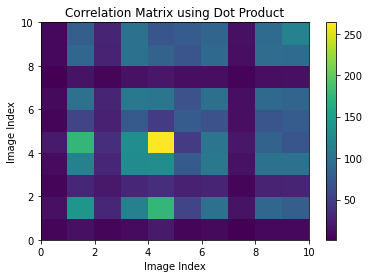

In [44]:
# Get 10 random images of yalefaces
X_sample2 = np.hstack((X[:,1][:, np.newaxis], X[:,313][:, np.newaxis], X[:,512][:, np.newaxis], X[:,5][:, np.newaxis], X[:,2400][:, np.newaxis], X[:,113][:, np.newaxis], X[:,1024][:, np.newaxis], X[:,87][:, np.newaxis], X[:,314][:, np.newaxis], X[:,2005][:, np.newaxis]))                    

# Compute the dot (matrix) product of two arrays, resulting in the correlation matrix
C_10=np.matmul(X_sample2.T,X_sample2)

# Print the correlation matrix
print(C_10)

# Plot the correlation matrix
plt.pcolor(C_10)
plt.colorbar()
plt.title('Correlation Matrix using Dot Product')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

[[ 1.          0.1105242   0.273356   -0.1986489   0.28082118 -0.02973873
  -0.08673298  0.03106362 -0.15037014 -0.02298657]
 [ 0.1105242   1.         -0.1209131  -0.0643527   0.66184926 -0.42456679
  -0.04301776 -0.02879531 -0.23874668 -0.36783239]
 [ 0.273356   -0.1209131   1.          0.07216265 -0.07231134  0.47764701
   0.2117886   0.3755663   0.24863053  0.24199405]
 [-0.1986489  -0.0643527   0.07216265  1.         -0.31891282  0.55694413
   0.78493513  0.06866668  0.70801069  0.59780543]
 [ 0.28082118  0.66184926 -0.07231134 -0.31891282  1.         -0.52414004
  -0.42597333  0.01202344 -0.6220728  -0.52277476]
 [-0.02973873 -0.42456679  0.47764701  0.55694413 -0.52414004  1.
   0.58174321  0.35909094  0.70334799  0.64274625]
 [-0.08673298 -0.04301776  0.2117886   0.78493513 -0.42597333  0.58174321
   1.          0.04258476  0.82147233  0.53157189]
 [ 0.03106362 -0.02879531  0.3755663   0.06866668  0.01202344  0.35909094
   0.04258476  1.          0.10620479  0.20345016]
 [-0.150

Text(0, 0.5, 'Image Index')

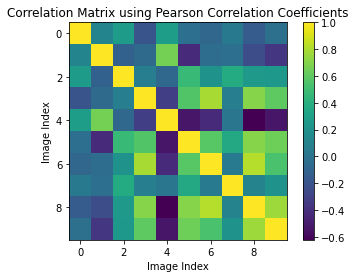

In [45]:
# Compute the correlation matrix using Pearson product-moment correlation coefficients
correlation_matrix2 = np.corrcoef(X_sample2.T)
print(correlation_matrix2)

# Plot the correlation matrix
plt.imshow(correlation_matrix2)
plt.colorbar()
plt.title('Correlation Matrix using Pearson Correlation Coefficients')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

# Highly correlated images are the ones in the diagonal, with values of 1.0
# Uncorrelated images have lower correlation values

In [46]:
# METHOD 1

# Compute the matrix Y = X*XT (dot product of the X matrix)
Y = np.dot(X, X.T)

# Find the top six eigenvectors of Y
eigenvalues, eigenvectors = np.linalg.eig(Y)
largest_eigval_indices = np.argsort(np.abs(eigenvalues))[::-1][:6]
top_eigenvectors = eigenvectors[:, largest_eigval_indices]

# Print the top six eigenvectors
print(top_eigenvectors)

print(top_eigenvectors.shape)

[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]
(1024, 6)


In [47]:
# METHOD 2

# Perform SVD on X
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Extract the first six principal component directions
PC = U[:, :6]

# Print the first six principal component directions
print(PC)

print(PC.shape)

[[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.05757412 -0.00941028]]
(1024, 6)


In [50]:
# Compare the eigenvector v1 found through Method 1 and the first SVD mode u1 found through Method 2

# Get the first eigenvector from Method 1
v1 = top_eigenvectors[:, 0]
  
# Get the first eigenvector from Method 2
u1 = PC[:, 0]
  
# Compute the norm of difference of their absolute values
abs_diff = np.abs(v1 - u1)
norm_abs_diff = np.linalg.norm(abs_diff)
  
# Print the value
print('Norm of difference:', norm_abs_diff)

Norm of difference: 2.0


Percentage of variance captured by each of the first 6 SVD modes:
[16.61404669  7.60529891  3.11688601  2.66576836  1.55554973  1.49743718]


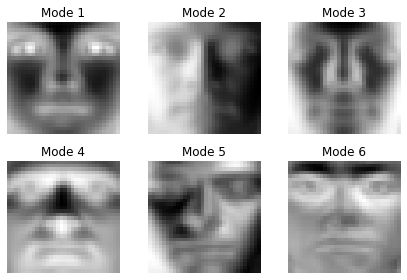

In [9]:
# Compute the percentage of variance captured by each of the first 6 SVD modes
variance_percentage = (S[:6]*2 / np.sum(S*2)) * 100

# Print the percentage of variance captured by each mode
print('Percentage of variance captured by each of the first 6 SVD modes:')
print(variance_percentage)

#Plot the first 6 SVD modes
fig, axs = plt.subplots(2, 3)
for i in range(6):
    ax = axs[i // 3, i % 3]
    ax.imshow(U[:, i].reshape(32, 32), cmap='gray')
    ax.axis('off')
    ax.set_title('Mode {}'.format(i+1))
plt.tight_layout()
plt.show()